# IMPORTING PACKAGES

In [53]:
import numpy as np
import pandas as pd

In [54]:
import matplotlib.pyplot as plt

# LOADING DATASET

In [67]:
df=pd.read_csv("C:/Users/KARTHIKA/Downloads/NSPP/dataset/NFLX.csv")

In [68]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-08-01,1.851429,1.857143,1.782143,1.782143,1.782143,6339200
1,2003-08-04,1.782143,1.797143,1.735714,1.782143,1.782143,3676400
2,2003-08-05,1.792857,1.817857,1.732857,1.736429,1.736429,3084200
3,2003-08-06,1.742857,1.750000,1.633571,1.668571,1.668571,8113000
4,2003-08-07,1.650714,1.667857,1.614286,1.649286,1.649286,7893200


# CONVERTING "DATE" COL INTO DATE FORMAT AND SORTING 

In [69]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by = 'Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-08-01,1.851429,1.857143,1.782143,1.782143,1.782143,6339200
1,2003-08-04,1.782143,1.797143,1.735714,1.782143,1.782143,3676400
2,2003-08-05,1.792857,1.817857,1.732857,1.736429,1.736429,3084200
3,2003-08-06,1.742857,1.750000,1.633571,1.668571,1.668571,8113000
4,2003-08-07,1.650714,1.667857,1.614286,1.649286,1.649286,7893200


# SETTING DATE COL AS INDEX

In [70]:
df.set_index('Date', inplace=True)

In [71]:
df.shape

(4299, 6)

In [59]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4299.000000,4299.000000,4299.000000,4299.000000,4299.000000,4.299000e+03
mean,85.137456,86.506299,83.731468,85.187151,85.187151,1.816332e+07
std,123.252283,125.243608,121.193015,123.337870,123.337870,2.003304e+07
min,1.300000,1.317143,1.272857,1.290000,1.290000,1.493800e+06
25%,4.143572,4.220000,4.067858,4.142857,4.142857,7.197400e+06
50%,22.384285,22.858572,21.722857,22.245714,22.245714,1.196440e+07
75%,105.120003,107.360000,102.685001,105.280002,105.280002,2.165660e+07
max,567.979980,575.369995,521.250000,548.729980,548.729980,3.234140e+08


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4299 entries, 2003-08-01 to 2020-08-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4299 non-null   float64
 1   High       4299 non-null   float64
 2   Low        4299 non-null   float64
 3   Close      4299 non-null   float64
 4   Adj Close  4299 non-null   float64
 5   Volume     4299 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 235.1+ KB


In [61]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [72]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-08-01,1.851429,1.857143,1.782143,1.782143,1.782143,6339200
2003-08-04,1.782143,1.797143,1.735714,1.782143,1.782143,3676400
2003-08-05,1.792857,1.817857,1.732857,1.736429,1.736429,3084200
2003-08-06,1.742857,1.750000,1.633571,1.668571,1.668571,8113000
2003-08-07,1.650714,1.667857,1.614286,1.649286,1.649286,7893200


# VISUALIZING CLOSE PRICE EVOLUTION

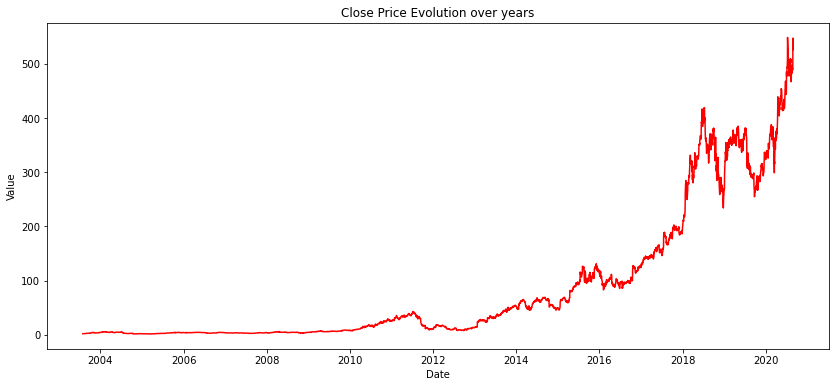

In [73]:
plt.figure(figsize=(14,6)) 
plt.plot(df.index,df["Close"],color="red")
plt.title("Close Price Evolution over years")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [74]:
#Gonna use "Close price" col for the rest of work
close_data=df.filter(['Close'])
#convert the dataset to an numpy array
dataset=close_data.values

In [75]:
dataset

array([[  1.782143],
       [  1.782143],
       [  1.736429],
       ...,
       [490.579987],
       [547.530029],
       [526.27002 ]])

In [76]:
training_data_count=round(len(dataset)*.7)
training_data_count

3009

In [77]:
#data scaling
from sklearn.preprocessing import MinMaxScaler

In [78]:
Scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=Scaler.fit_transform(dataset)

scaled_data

array([[8.98989876e-04],
       [8.98989876e-04],
       [8.15484832e-04],
       ...,
       [8.93778323e-01],
       [9.97808068e-01],
       [9.58972744e-01]])

In [79]:
#creating training dataset
train_data=scaled_data[0:training_data_count,:]
#split the data
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [80]:
#converting x_train,y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [81]:
#reshape to three dimensional
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2949, 60, 1)

# BUILDING LSTM MODEL

In [82]:
#building LSTM model
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.optimizers import Adam
from keras.models import load_model
import keras.backend as K
from keras.layers import LSTM

In [83]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [84]:
model.compile(optimizer='adam',loss="mean_squared_error")

In [85]:
model.fit(x_train,y_train,epochs=20)

Epoch 1/20
93/93 [==============================] - 7s 35ms/step - loss: 1.0271e-04
Epoch 2/20
93/93 [==============================] - 3s 35ms/step - loss: 1.4642e-05
Epoch 3/20
93/93 [==============================] - 3s 35ms/step - loss: 1.5971e-05
Epoch 4/20
93/93 [==============================] - 3s 35ms/step - loss: 1.5325e-05
Epoch 5/20
93/93 [==============================] - 3s 34ms/step - loss: 1.3333e-05
Epoch 6/20
93/93 [==============================] - 3s 34ms/step - loss: 9.6283e-06
Epoch 7/20
93/93 [==============================] - 3s 34ms/step - loss: 1.1440e-05
Epoch 8/20
93/93 [==============================] - 3s 34ms/step - loss: 8.1733e-06
Epoch 9/20
93/93 [==============================] - 3s 34ms/step - loss: 9.3698e-06
Epoch 10/20
93/93 [==============================] - 3s 34ms/step - loss: 8.5881e-06
Epoch 11/20
93/93 [==============================] - 4s 41ms/step - loss: 7.2716e-06
Epoch 12/20
93/93 [==============================] - 4s 40ms/step - loss: 

# PREDICTION

In [86]:
#create testing dataset
test_data=scaled_data[training_data_count-60:,:]

x_test=[]
y_test=dataset[training_data_count:,:]#actual predicted (the 61st values)
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [87]:
#convert into numpy array
x_test=np.array(x_test)

In [88]:
#reshape to three dimensional array
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [89]:
predicted_values=model.predict(x_test)
predicted_values=Scaler.inverse_transform(predicted_values)#unscaling

41/41 [==============================] - 1s 13ms/step


In [90]:
train=close_data[:training_data_count]
actual=close_data[training_data_count:]
actual["Predicted"]=predicted_values

C:\Users\KARTHIKA\AppData\Local\Temp/ipykernel_5856/2529549262.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actual["Predicted"]=predicted_values


In [91]:
#lets check our predictions with actual values
actual

,Close,Predicted
Date,,
2015-07-16,115.809998,99.956787
2015-07-17,114.769997,104.446663
2015-07-20,110.550003,109.229118
2015-07-21,112.510002,111.865112
2015-07-22,111.500000,113.371765
...,...,...
2020-08-21,492.309998,483.447601
2020-08-24,488.809998,486.760498
2020-08-25,490.579987,487.665924


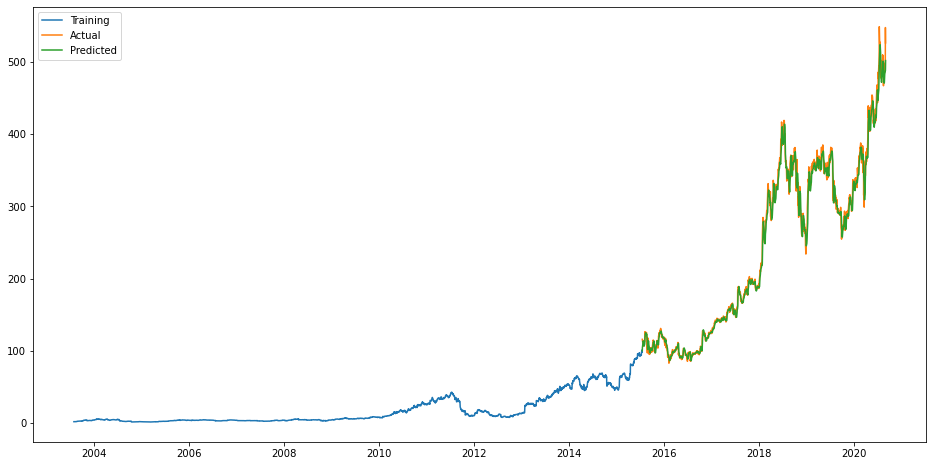

In [92]:
plt.figure(figsize=(16,8))
plt.plot(train["Close"])
plt.plot(actual[["Close","Predicted"]])
plt.legend(["Training","Actual","Predicted"])
plt.show()

# predicting the next day's stock's close price

In [93]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-08-01,1.851429,1.857143,1.782143,1.782143,1.782143,6339200
2003-08-04,1.782143,1.797143,1.735714,1.782143,1.782143,3676400
2003-08-05,1.792857,1.817857,1.732857,1.736429,1.736429,3084200
2003-08-06,1.742857,1.750000,1.633571,1.668571,1.668571,8113000
2003-08-07,1.650714,1.667857,1.614286,1.649286,1.649286,7893200


In [96]:
my_new_df=df

In [97]:
my_new_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-08-01,1.851429,1.857143,1.782143,1.782143,1.782143,6339200
2003-08-04,1.782143,1.797143,1.735714,1.782143,1.782143,3676400
2003-08-05,1.792857,1.817857,1.732857,1.736429,1.736429,3084200
2003-08-06,1.742857,1.750000,1.633571,1.668571,1.668571,8113000
2003-08-07,1.650714,1.667857,1.614286,1.649286,1.649286,7893200
...,...,...,...,...,...,...
2020-08-21,496.459991,498.130005,490.000000,492.309998,492.309998,3921300
2020-08-24,495.440002,501.000000,483.160004,488.809998,488.809998,4762200
2020-08-25,488.190002,492.470001,485.089996,490.579987,490.579987,5727700


In [99]:
my_new_df1=my_new_df.filter(["Close"])
#taking last 60 data
history_data=my_new_df1[-60:].values
#data scaling
history_data_scaled=Scaler.transform(history_data)

#creating an empty list
X_test=[]

#append the history data
X_test.append(history_data_scaled)

#converting into an numpy array
X_test=np.array(X_test)

#reshape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#prediction
prediction=model.predict(X_test)

prediction=Scaler.inverse_transform(prediction)
print(prediction)

1/1 [==============================] - 0s 26ms/step
[[512.96356]]
